In [8]:
import h5py
import numpy as np
import tensorflow as tf 
import keras
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from keras.models import Model
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def splitSamples(data, label, train_size):
    unique_classes = np.unique(label)  #获取唯一的类别标签
    precentage = train_size
    
    trainData = []
    trainLabel = []
    testData = []
    testLabel = []

    for i in unique_classes:
        index = np.where(label == i)[0]
        np.random.shuffle(index)
        num_train = int(precentage * len(index))    #使用int得到截断值
        index_train = index[:num_train]
        index_test = index[num_train:]

        trainData.extend(data[index_train, :])
        trainLabel.extend(label[index_train])
        testData.extend(data[index_test, :])
        testLabel.extend(label[index_test])
    
    trainData = np.array(trainData)
    trainLabel = np.array(trainLabel).reshape(-1, 1)
    testData = np.array(testData)
    testLabel = np.array(testLabel).reshape(-1, 1)

    return trainData, trainLabel, testData, testLabel

In [10]:
import h5py
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import time 

#导入之前得到的图像数据
file = h5py.File('DB2_S1_image_200_0.h5','r')
imageData   = file['imageData'][:]
imageLabel  = file['imageLabel'][:]
file.close()

#将数据和标签分割成测试集和训练集
trainData, trainLabel, testData, testLabel = splitSamples(imageData, imageLabel, train_size=0.8)
#对数据升维
trainData = np.expand_dims(trainData,axis=3)
testData = np.expand_dims(testData,axis=3)

#将训练集和测试集的标签转为独热编码one-hot
trainLabel = tf.keras.utils.to_categorical(trainLabel)
testLabel = tf.keras.utils.to_categorical(testLabel)

In [11]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate
from keras.models import Model

# 定义输入形状
input_shape2 = (200, 12, 1)

# 输入层
input_layer2 = Input(shape=input_shape2)

# 第一个卷积分支
branch1 = Conv2D(32, kernel_size=(32, 3), padding='same', activation='relu')(input_layer2)
branch1 = MaxPooling2D(pool_size=(20, 1))(branch1)
branch1 = Conv2D(64, kernel_size=(6, 1), padding='same', activation='relu')(branch1)
branch1 = MaxPooling2D(pool_size=(2, 1))(branch1)

# 第二个卷积分支
branch2 = Conv2D(32, kernel_size=(20, 3), padding='same', activation='relu')(input_layer2)
branch2 = MaxPooling2D(pool_size=(20, 1))(branch2)
branch2 = Conv2D(64, kernel_size=(8, 1), padding='same', activation='relu')(branch2)
branch2 = MaxPooling2D(pool_size=(2, 1))(branch2)

branch3 = Conv2D(32, kernel_size=(16, 3), padding='same', activation='relu')(input_layer2)
branch3 = MaxPooling2D(pool_size=(20, 1))(branch3)
branch3 = Conv2D(64, kernel_size=(12, 1), padding='same', activation='relu')(branch3)
branch3 = MaxPooling2D(pool_size=(2, 1))(branch3)

branch4 = Conv2D(32, kernel_size=(8, 3), padding='same', activation='relu')(input_layer2)
branch4 = MaxPooling2D(pool_size=(20, 1))(branch4)
branch4 = Conv2D(64, kernel_size=(16, 1), padding='same', activation='relu')(branch4)
branch4 = MaxPooling2D(pool_size=(2, 1))(branch4)


# 合并两个分支
merged_branches2 = concatenate([branch1, branch2, branch3, branch4])

# 进一步处理合并后的特征
merged_branches2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(merged_branches2)
merged_branches2 = MaxPooling2D(pool_size=(1, 1))(merged_branches2)

# 全连接层
merged_branches2 = Flatten()(merged_branches2)
output_layer2 = Dropout(0.5)(merged_branches2)
output_layer2 = Dense(128,activation = 'relu')(output_layer2)
output_layer2 = Dropout(0.4)(output_layer2)
output_layer2 = Dense(49, activation='softmax')(output_layer2)

# 定义模型
model2 = Model(inputs=input_layer2, outputs=output_layer2)

# 编译模型
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型结构
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 12,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 200, 12,   │      3,104 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 200, 12,   │      1,952 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 200, 12,   │      1,568 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 200, 12,   │        800 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 10, 12,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 10, 12,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 10, 12,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 10, 12,    │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 10, 12,    │     12,352 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 10, 12,    │     16,448 │ max_pooling2d_11… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 10, 12,    │     24,640 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 10, 12,    │     32,832 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 5, 12, 64) │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 5, 12, 64) │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 5, 12, 64) │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 5, 12, 64) │          0 │ conv2d_16[0][0] 

 Total params: 886,705 (3.38 MB)

 Trainable params: 886,705 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import time
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

# 训练模型
'''model参数：
verbose————日志显示模式，0 表示不在标准输出流输出日志信息，
                     1 表示输出进度条记录，
                     2 表示每个 epoch 输出一行记录。'''
history2 = model2.fit(trainData, trainLabel, epochs=300, batch_size=280)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - accuracy: 0.0559 - loss: 3.7786
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.2025 - loss: 3.0429
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.3219 - loss: 2.4392
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.4003 - loss: 2.0803
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.4550 - loss: 1.8601
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.5093 - loss: 1.6522
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.5383 - loss: 1.5574
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.5585 - loss: 1.4597
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - accuracy: 0.5939 - loss: 1.3436
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.6101 - loss: 1.2653
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.6312 - loss: 1.1923
Epoch 12/300
34/34 ━━━━━━━━━━━━

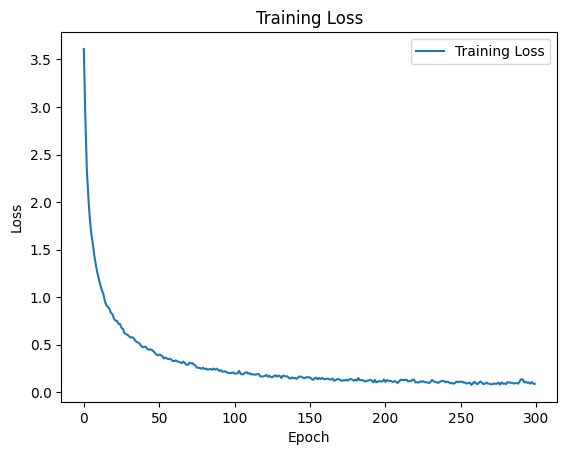

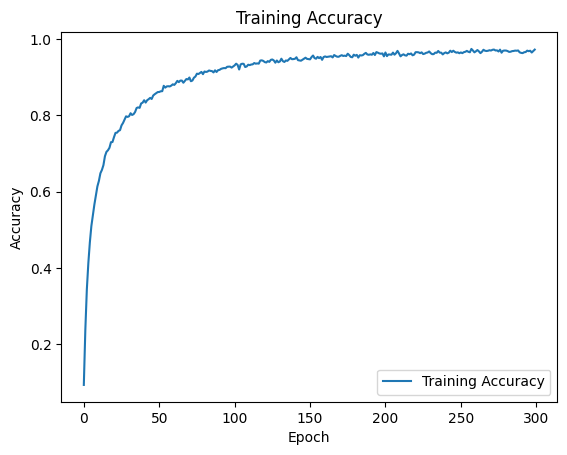

298/298 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 1.0000 - loss: 6.8823e-04
Train accuracy: 1.0
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8405 - loss: 0.7698
Test Loss = 0.7456703782081604
Test Accuracy = 0.8474012613296509
训练模型花费的时间: 2577.66 秒


In [13]:
# 绘制训练损失和验证损失曲线
plt.plot(history2.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练准确率和验证准确率曲线
plt.plot(history2.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 评估模型
train_loss2, train_acc2 = model2.evaluate(trainData, trainLabel)
print('Train accuracy:', train_acc2)

# 使用模型进行预测
predictions2 = model2.evaluate(testData, testLabel)
print("Test Loss = " + str(predictions2[0]))
print("Test Accuracy = " + str(predictions2[1]))
print('训练模型花费的时间: %.2f 秒' % (time.time() - start_time))

In [14]:
import json

# 训练模型
# 将 history 转换为字典
history_dict = history2.history

# 保存为 JSON 文件
with open('history3-s1.json', 'w') as json_file:
    json.dump(history_dict, json_file)